In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from PIL import Image

data_dir = "/content/drive/MyDrive/Solar/Faulty_solar_panel"

class_names = os.listdir(data_dir)
print("Class names:", class_names)

data = {class_name: [] for class_name in class_names}
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    image_files = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        image = Image.open(image_path)
        data[class_name].append(image)


Class names: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


In [4]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_shape = (299, 299, 3)
num_classes = 6
batch_size = 32
epochs = 15

data_dir = "/content/drive/MyDrive/Solar/Faulty_solar_panel"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)

predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Found 711 images belonging to 6 classes.
Found 174 images belonging to 6 classes.
Epoch 1/15
22/22 [==============================] - 43s 2s/step - loss: 1.9563 - accuracy: 0.3770 - val_loss: 1.1426 - val_accuracy: 0.6375
Epoch 2/15
22/22 [==============================] - 36s 2s/step - loss: 0.9651 - accuracy: 0.6716 - val_loss: 0.8401 - val_accuracy: 0.7312
Epoch 3/15
22/22 [==============================] - 36s 2s/step - loss: 0.8333 - accuracy: 0.7187 - val_loss: 0.9035 - val_accuracy: 0.6938
Epoch 4/15
22/22 [==============================] - 35s 2s/step - loss: 0.7145 - accuracy: 0.7673 - val_loss: 0.8238 - val_accuracy: 0.7000
Epoch 5/15
22/22 [==============================] - 35s 2s/step - loss: 0.6753 - accuracy: 0.7644 - val_loss: 0.8320 - val_accuracy: 0.7250
Epoch 6/15
22/22 [==============================] - 36s 2s/step - loss: 0.5905 - accuracy: 0.7820 - val_loss: 0.5969 - val_accuracy: 0.8000
Epoch 7/15
22/22 [==============================] - 35s 2s/step - loss: 0.5436

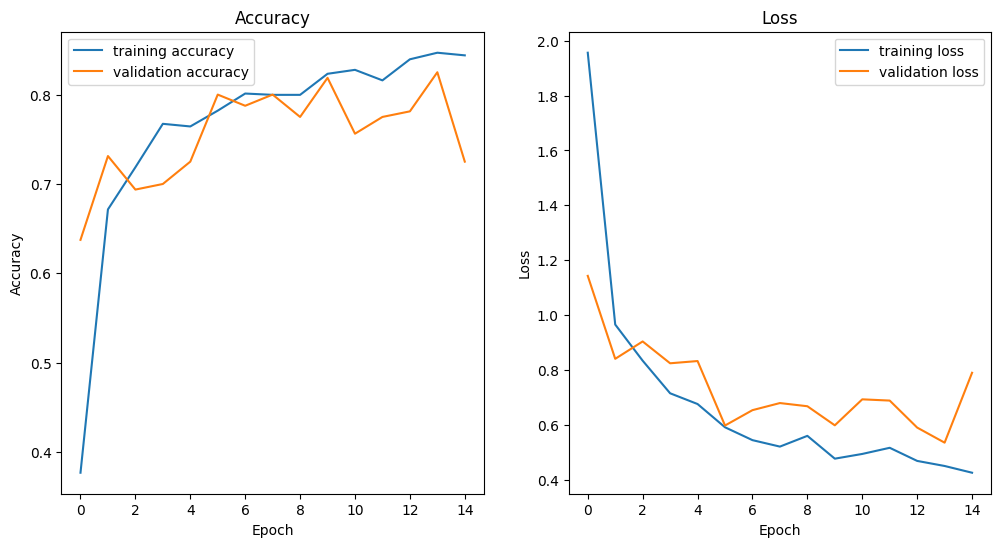

In [8]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
final_training_accuracy = history.history['accuracy'][-1]
print("Final Training Accuracy:", final_training_accuracy*100,"%")

Final Training Accuracy: 98.438880443573 %
